<a href="https://colab.research.google.com/github/calebdhuang/fall-detection-/blob/main/OLD_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fadeel Khan, Caleb Huang, Matthew Su
## DSCI 303 HW 4 - Exploratory Data Analysis

In [ ]:
#Fadeel Khan, Caleb Huang, Matthew Su
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import necessary libraries 
import pandas as pd 
import os 
import glob 
   
   
# use glob to get all the csv files  
# in the folder 
path = os.getcwd() 
csv_files = glob.glob(os.path.join(path, "*.csv")) 
 
 
#create list of all activity titles 
activities = ['STD', 'WAL', 'JOG', 'JUM', 'STU', 'STN', 'SCH', 'SIT', 'CHU', 'CSI', 'CSO', 'FKL', 'FOL', 'BSC', 'SDL']
master = pd.DataFrame() 
means = pd.DataFrame() 
maxes = pd.DataFrame() 
mins = pd.DataFrame() 
 
for activity in activities:  
  location = '/content/drive/Shareddrives/DSCI303' + '/' + activity 
  standinglist = (os.listdir(location)) 
 
  for i in standinglist: 
    filepath = location + '/' + i 
    #convert file in testdf 
    testdf = pd.read_csv(filepath) 
    #group all rows by label of activity 
    test = testdf.groupby(['label']) 
    #add min and max values 
    tester = test.mean()
     
    #drop time columns 
    tester = tester.drop(columns = ['timestamp', 'rel_time']) 
 
    #add aggregated data into master data frame 
    means = means.append(tester) 
 
# Moving labels from index to a column 
master = means.reset_index(drop=False) 

#Distribution Graphs:  Section

# Data Pre-Processing to Usable Form

We are including the mean, max and min values of each clinical trial. We intend to use the mean value as an indictor of the label. However, we are incorporating max and min to see if they have any correlation with the labels.

In [ ]:
# import necessary libraries
import pandas as pd
import os
import glob
  
  
# use glob to get all the csv files 
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))


#create list of all activity titles
activities = ['STD', 'WAL', 'JOG', 'JUM', 'STU', 'STN', 'SCH', 'SIT', 'CHU', 'CSI', 'CSO', 'FKL', 'FOL', 'BSC', 'SDL']
master = pd.DataFrame()
means = pd.DataFrame()
maxes = pd.DataFrame()
mins = pd.DataFrame()

for activity in activities: 
  location = '/content/drive/Shareddrives/DSCI303' + '/' + activity
  standinglist = (os.listdir(location))

  for i in standinglist:
    filepath = location + '/' + i
    #convert file in testdf
    testdf = pd.read_csv(filepath)
    #group all rows by label of activity
    test = testdf.groupby(['label'])
    #add min and max values
    tester = test.mean()
    maxx = testdf.groupby(['label']).max()
    minn = testdf.groupby(['label']).min()
    
    #drop time columns
    tester = tester.drop(columns = ['timestamp', 'rel_time'])
    maxx = maxx.drop(columns = ['timestamp', 'rel_time'])
    minn = minn.drop(columns = ['timestamp', 'rel_time'])

    # Renaming
    maxx = maxx.rename(columns={"acc_x": "max_acc_x", "acc_y": "max_acc_y", "acc_z": "max_acc_z", "gyro_x": "max_gyro_x", "gyro_y": "max_gyro_y", "gyro_z": "max_gyro_z", "azimuth": "max_azimuth", "pitch": "max_pitch", "roll": "max_roll"})
    minn = minn.rename(columns={"acc_x": "min_acc_x", "acc_y": "min_acc_y", "acc_z": "min_acc_z", "gyro_x": "min_gyro_x", "gyro_y": "min_gyro_y", "gyro_z": "min_gyro_z", "azimuth": "min_azimuth", "pitch": "min_pitch", "roll": "min_roll"})

    #add aggregated data into master data frame
    means = means.append(tester)
    mins = mins.append(minn)
    maxes = maxes.append(maxx)

# Moving labels from index to a column
means = means.reset_index(drop=False)
maxes = maxes.reset_index(drop=False)
mins = mins.reset_index(drop=False)

maxes = maxes.drop(columns = ['label'])
mins = mins.drop(columns = ['label'])

master = pd.concat([means,maxes,mins], axis=1)

In [ ]:
# excel --> add jerk stuff to it --> export as a csv --> import new and improved csv file () --> EDA/preprocessing (min,max,avg) / make master

# for single_excel sheet in entiredataset:
#   dt = testdf['timestamp'].tail(1) - testdf['timestamp'].head(1)
#   df['JerkAcc'] = ....
#   df.to_csv('location')


0      NaN
1961   NaN
Name: timestamp, dtype: float64

In [ ]:
master

,label,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,...,max_roll,min_acc_x,min_acc_y,min_acc_z,min_gyro_x,min_gyro_y,min_gyro_z,min_azimuth,min_pitch,min_roll
0,STD,-0.854436,9.642310,-2.250488,0.004283,0.000140,0.007415,306.164137,-104.041694,-4.930065,...,45.256940,-1.809570,9.253556,-2.816139,-0.605367,-0.393092,-0.105069,0.000000,-152.734900,-51.501950
1,STD,1.055158,9.685528,1.733203,0.002060,0.001796,0.009070,293.992181,-78.026729,6.115445,...,8.674932,-0.541535,9.054360,0.141682,-1.275181,-2.244319,-0.146302,0.000000,-82.596850,-72.472984
2,STD,-2.135354,9.659697,0.082741,-0.003259,-0.002110,0.004561,105.837462,-86.562022,-12.094852,...,17.142962,-4.542685,7.969230,-1.756481,-0.636522,-1.630705,-0.333227,91.299065,-106.483894,-16.443895
3,STD,-2.098517,9.567071,1.188102,-0.016764,0.001900,0.008769,46.677027,-73.325690,-16.421131,...,0.533395,-3.051447,9.137158,0.461114,-0.143553,-0.411418,-0.072388,0.314409,-98.794500,-19.162735
4,STD,1.643435,9.790809,-0.278615,-0.002561,-0.004125,0.004378,265.318943,-98.935069,9.453252,...,38.925705,1.161026,9.580615,-1.301095,-0.068417,-0.195477,-0.072693,210.212880,-101.459940,4.121647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,SDL,-1.614871,3.619486,5.292432,-0.407888,0.475601,-0.145117,240.184677,-26.478097,-7.319636,...,36.433105,-12.738382,-14.506325,-1.489760,-2.360383,-4.805677,-3.692375,206.351820,-80.274940,-40.267452
8232,STD,2.054522,9.699086,0.133555,-0.181134,0.085751,0.009688,252.279227,-41.790419,-21.487358,...,-5.318121,1.610742,9.605748,-0.095699,-1.509448,-0.289856,-0.054367,246.604190,-71.989060,-35.707577
8233,LYI,-7.496127,-0.954398,5.997271,-0.007828,-0.018037,0.009056,257.736227,6.139357,-49.575215,...,-44.844112,-8.981419,-2.540242,5.096840,-0.418137,-0.504880,-0.151800,251.912350,3.706781,-54.511063
8234,SDL,-3.730302,3.069642,5.021443,-0.538789,0.350284,-0.094782,253.217327,-24.840463,-26.467930,...,11.956879,-18.023721,-16.008376,-6.780667,-2.236378,-2.477670,-4.172821,222.739120,-70.073680,-56.906754


# Finding the Best Features through Sequential Feature Selection

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel

# Seperating features and variables
y = master[['label']]
X = master[['acc_x',	'acc_y',	'acc_z',	'gyro_x',	'gyro_y',	'gyro_z',	'azimuth',	'pitch',	'roll']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Modeling using raw data
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         BSC       0.77      0.66      0.71        35
         CHU       0.95      0.84      0.89        25
         CSI       0.74      0.90      0.81        61
         CSO       0.99      0.99      0.99        67
         FKL       0.70      0.70      0.70        46
         FOL       0.53      0.40      0.46        45
         JOG       1.00      0.15      0.26        40
         JUM       0.96      0.83      0.89        30
         LYI       0.74      0.75      0.75       150
         SCH       0.84      0.89      0.86        80
         SDL       0.75      0.69      0.72        39
         SIT       0.84      0.84      0.84       242
         STD       0.78      0.99      0.88       644
         STN       0.00      0.00      0.00        69
         STU       0.88      0.11      0.20        63
         WAL       0.00      0.00      0.00        12

    accuracy                           0.79      1648
   macro avg       0.72   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
! pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We looked at forward and backward sequential feature selection and got recommendations for which features would be the best for predicting our labels.

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector.get_support

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sfs = SequentialFeatureSelector(knn, direction='backward')
sfs = sfs.fit(X_train, y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [ ]:
print(sfs.get_support())

[ True  True  True  True False False False False False]


Now, using the features recommended by sequential feature selection, we make our model again:

In [ ]:
# Seperating features and variables
y = master[['label']]
X = master[['acc_x',	'acc_y',	'acc_z',	'gyro_x']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Modeling using raw data
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

clf = clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print(classification_report(y_test, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

         BSC       0.79      0.54      0.64        35
         CHU       0.87      0.80      0.83        25
         CSI       0.70      0.92      0.79        61
         CSO       0.83      0.94      0.88        67
         FKL       0.74      0.76      0.75        46
         FOL       0.50      0.33      0.40        45
         JOG       0.67      0.05      0.09        40
         JUM       0.80      0.80      0.80        30
         LYI       0.65      0.49      0.56       150
         SCH       0.84      0.86      0.85        80
         SDL       0.55      0.46      0.50        39
         SIT       0.73      0.86      0.79       242
         STD       0.78      0.99      0.87       644
         STN       0.00      0.00      0.00        69
         STU       0.00      0.00      0.00        63
         WAL       0.00      0.00      0.00        12

    accuracy                           0.75      1648
   macro avg       0.59   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Here, we can see that the accuracy actually went DOWN. Thus, we are no longer using sequential feature selection to seelct our features. Instead, we will be using a variety of different correlation methods as described below.

# New Features Engineering

In [ ]:
import numpy as np
# New Features Engineering
processed = pd.DataFrame()
processed['label'] = master['label']
processed['SMV_acc'] = np.sqrt((master['acc_x'])**2 + (master['acc_y'])**2 + (master['acc_z'])**2)
processed['SMV_gyro'] = np.sqrt((master['gyro_x'])**2 + (master['gyro_y'])**2 + (master['gyro_z'])**2)
processed['SMV_orient'] = np.sqrt((master['azimuth'])**2 + (master['pitch'])**2 + (master['roll'])**2)
processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8236 entries, 0 to 8235
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   label       8236 non-null   object 
 1   SMV_acc     8236 non-null   float64
 2   SMV_gyro    8236 non-null   float64
 3   SMV_orient  8236 non-null   float64
dtypes: float64(3), object(1)
memory usage: 257.5+ KB


# Visualizing Seperability in 3 Dimensions

##For data visualization, we decided it would be better to visualize the separability between the classes of activities of daily living. We also visualized the separability between the activities that led to falls and the activities that didn't lead to falls. Both graphs below indciate clear separability between the different classes in our data that we're analyzing. Since our data is based on classes and not continuous, we are not looking at distributions.

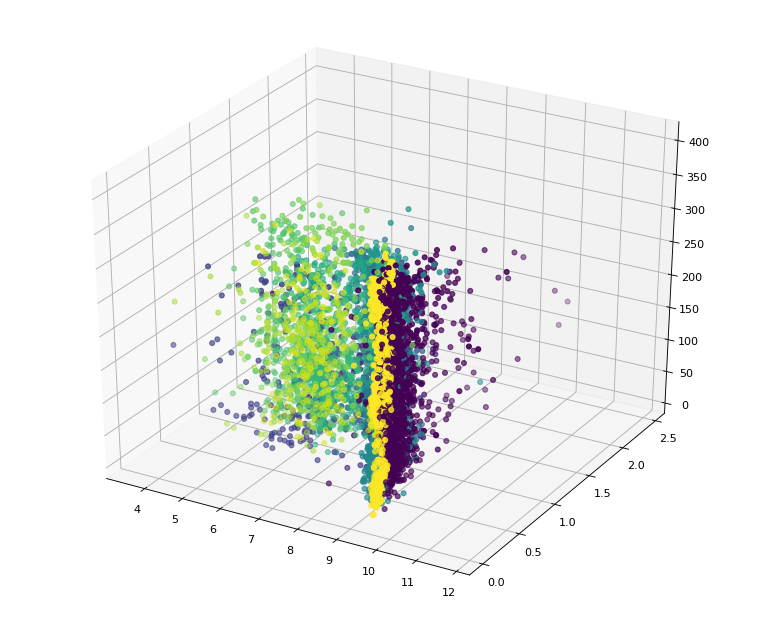

In [ ]:
# Visualizing the classes/activities
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
A=processed['label'].replace(['STD', 'WAL', 'JOG', 'JUM', 'STU', 'STN', 'SCH', 'SIT', 'CHU', 'CSI', 'CSO', 'FKL', 'FOL', 'BSC', 'SDL','LYI'],[0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
fig=figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(projection='3d')
ax.scatter(processed[['SMV_acc']], processed[['SMV_gyro']], processed[['SMV_orient']], c=A)
#ax.scatter(processed[['']], processed[['SMV_gyro']], processed[['SMV_orient']], c=A)

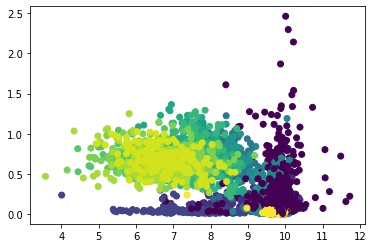

In [ ]:
#2D scatterplot visualization
plt.scatter(processed[['SMV_acc']], processed[['SMV_gyro']], c=A)


After looking at seperability of all of our classes, we wanted to look at the separability of our data for the TWO binary classes: Falling vs. Not Falling. We first classified all of our falling data as 1 and all of our non-falling data (i.e., activities that did not have a fall) as 0. Then we were able to visualize it.

In [ ]:
processed['label'].replace(['STD', 'WAL', 'JOG', 'JUM', 'STU', 'STN', 'SCH', 'SIT', 'CHU', 'CSI', 'CSO', 'LYI'],0,inplace=True)
processed['label'].replace(['FKL', 'FOL', 'BSC', 'SDL'],1,inplace=True)

In [ ]:
# Visualizing the classes/activities
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#A=processed['label'].replace(['STD', 'WAL', 'JOG', 'JUM', 'STU', 'STN', 'SCH', 'SIT', 'CHU', 'CSI', 'CSO', 'FKL', 'FOL', 'BSC', 'SDL','LYI'],[0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
fig=figure(figsize=(12, 10), dpi=80)
ax = fig.add_subplot(projection='3d')
ax.scatter(processed[['SMV_acc']], processed[['SMV_gyro']], processed[['SMV_orient']], c=processed[['label']])

In [ ]:
master

,label,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,...,max_roll,min_acc_x,min_acc_y,min_acc_z,min_gyro_x,min_gyro_y,min_gyro_z,min_azimuth,min_pitch,min_roll
0,STD,-0.854436,9.642310,-2.250488,0.004283,0.000140,0.007415,306.164137,-104.041694,-4.930065,...,45.256940,-1.809570,9.253556,-2.816139,-0.605367,-0.393092,-0.105069,0.000000,-152.734900,-51.501950
1,STD,1.055158,9.685528,1.733203,0.002060,0.001796,0.009070,293.992181,-78.026729,6.115445,...,8.674932,-0.541535,9.054360,0.141682,-1.275181,-2.244319,-0.146302,0.000000,-82.596850,-72.472984
2,STD,-2.135354,9.659697,0.082741,-0.003259,-0.002110,0.004561,105.837462,-86.562022,-12.094852,...,17.142962,-4.542685,7.969230,-1.756481,-0.636522,-1.630705,-0.333227,91.299065,-106.483894,-16.443895
3,STD,-2.098517,9.567071,1.188102,-0.016764,0.001900,0.008769,46.677027,-73.325690,-16.421131,...,0.533395,-3.051447,9.137158,0.461114,-0.143553,-0.411418,-0.072388,0.314409,-98.794500,-19.162735
4,STD,1.643435,9.790809,-0.278615,-0.002561,-0.004125,0.004378,265.318943,-98.935069,9.453252,...,38.925705,1.161026,9.580615,-1.301095,-0.068417,-0.195477,-0.072693,210.212880,-101.459940,4.121647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,SDL,-1.614871,3.619486,5.292432,-0.407888,0.475601,-0.145117,240.184677,-26.478097,-7.319636,...,36.433105,-12.738382,-14.506325,-1.489760,-2.360383,-4.805677,-3.692375,206.351820,-80.274940,-40.267452
8232,STD,2.054522,9.699086,0.133555,-0.181134,0.085751,0.009688,252.279227,-41.790419,-21.487358,...,-5.318121,1.610742,9.605748,-0.095699,-1.509448,-0.289856,-0.054367,246.604190,-71.989060,-35.707577
8233,LYI,-7.496127,-0.954398,5.997271,-0.007828,-0.018037,0.009056,257.736227,6.139357,-49.575215,...,-44.844112,-8.981419,-2.540242,5.096840,-0.418137,-0.504880,-0.151800,251.912350,3.706781,-54.511063
8234,SDL,-3.730302,3.069642,5.021443,-0.538789,0.350284,-0.094782,253.217327,-24.840463,-26.467930,...,11.956879,-18.023721,-16.008376,-6.780667,-2.236378,-2.477670,-4.172821,222.739120,-70.073680,-56.906754


In [ ]:
master_binary = master.copy()

master_binary['label'].replace(['STD', 'WAL', 'JOG', 'JUM', 'STU', 'STN', 'SCH', 'SIT', 'CHU', 'CSI', 'CSO', 'LYI'],0,inplace=True)
master_binary['label'].replace(['FKL', 'FOL', 'BSC', 'SDL'],1,inplace=True)

## Visualizing Correlations

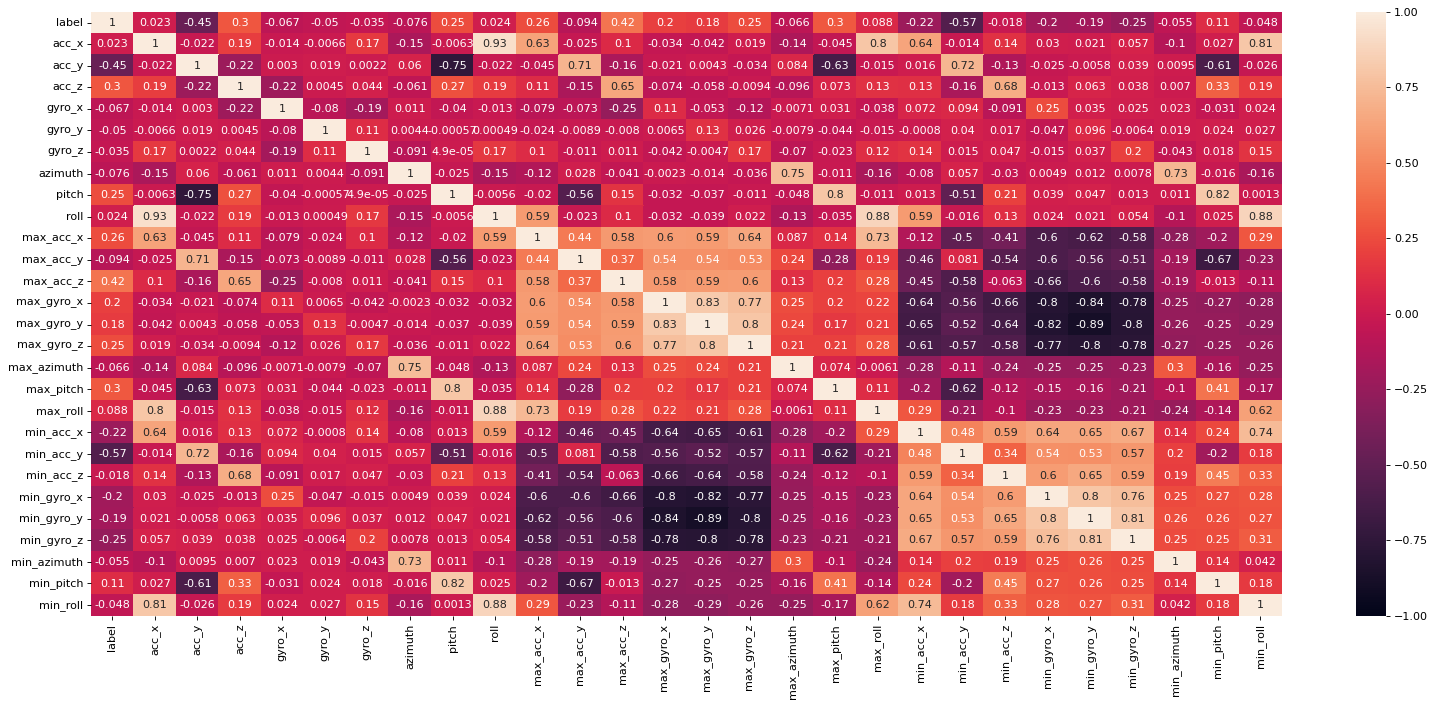

In [ ]:
# Heat map
import seaborn as sns
master['label'].replace(['STD', 'WAL', 'JOG', 'JUM', 'STU', 'STN', 'SCH', 'SIT', 'CHU', 'CSI', 'CSO', 'FKL', 'FOL', 'BSC', 'SDL','LYI'],[0, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],inplace=True)
figure(figsize=(24, 10), dpi=80)
sns.heatmap(master.corr(), vmin=-1, vmax=1, annot=True)

## After looking at the correlations, we are setting an absolute threshold correlation of 0.2 so that any feature greater than or equal to 0.2 would be included in our further modeling. These features include:

- acc_y
- acc_z
- pitch
- max_acc_x
- max_acc_z
- max_gyro_x
- max_gyro_z
- max_pitch
- min_acc_x
- min_acc_y
- min_gyro_x
- min_gyro_z

# Looking at Missing Data and Skewness

## Note: since the data is sourced from live sensors, there is not any "missing data". Rather, principles of signal processing have been applied in this EDA.

In [ ]:
# Finding missing data
df_na = (master.isnull().sum() / len(master)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20) # No missing data

,Missing Ratio


In [ ]:
from scipy.stats import skew
variables = master[['acc_x',	'acc_y',	'acc_z',	'gyro_x',	'gyro_y',	'gyro_z',	'azimuth',	'pitch',	'roll']]
numeric_feats = variables.dtypes[master.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = variables[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
pitch,1.067742
azimuth,0.076520
acc_x,-0.078218
roll,-0.094764
acc_z,-0.108711
gyro_x,-0.151858
gyro_z,-0.167895
gyro_y,-0.748881
acc_y,-1.011630


After looking at skewness, we determined that our data did not have enough skewness (not more than an absolute value of 1.1) so we do not have to correct for this.

#KNN Model
####Testing different values for K

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

<Figure size 432x288 with 0 Axes>

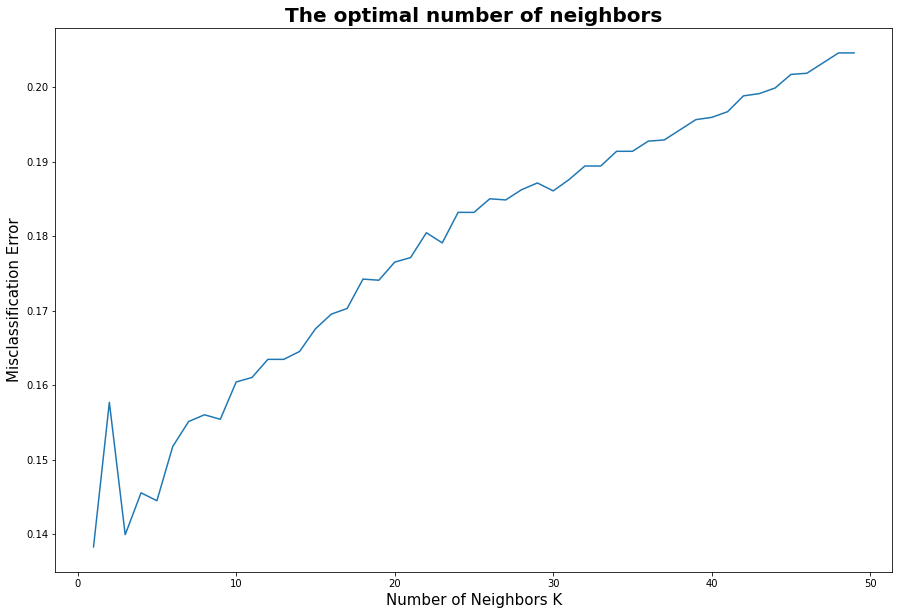

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X = master[['acc_y', 'acc_z', 'pitch', 'max_acc_x','max_acc_z', 'max_gyro_x', 'max_gyro_z', 'max_pitch', 'min_acc_x', 'min_acc_y', 'min_gyro_x', 'min_gyro_z']]
y = master[['label']]
# X = processed[['SMV_acc', 'SMV_gyro', 'SMV_orient']]
# y = processed[['label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# creating list of K for KNN
k_list = list(range(1,50))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


# changing to misclassification error
MSE = [1-x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
# KNN using selected features
from sklearn.metrics import classification_report
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         BSC       0.80      0.80      0.80        35
         CHU       0.74      0.56      0.64        25
         CSI       0.67      0.67      0.67        61
         CSO       0.69      0.76      0.72        67
         FKL       0.68      0.65      0.67        46
         FOL       0.59      0.58      0.58        45
         JOG       0.78      0.78      0.78        40
         JUM       0.64      0.70      0.67        30
         LYI       0.68      0.70      0.69       150
         SCH       0.77      0.79      0.78        80
         SDL       0.64      0.64      0.64        39
         SIT       0.81      0.79      0.80       242
         STD       0.99      0.99      0.99       644
         STN       0.71      0.67      0.69        69
         STU       0.73      0.78      0.75        63
         WAL       0.33      0.25      0.29        12

    accuracy                           0.82      1648
   macro avg       0.70   

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
master

,label,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,...,max_roll,min_acc_x,min_acc_y,min_acc_z,min_gyro_x,min_gyro_y,min_gyro_z,min_azimuth,min_pitch,min_roll
0,STD,-0.854436,9.642310,-2.250488,0.004283,0.000140,0.007415,306.164137,-104.041694,-4.930065,...,45.256940,-1.809570,9.253556,-2.816139,-0.605367,-0.393092,-0.105069,0.000000,-152.734900,-51.501950
1,STD,1.055158,9.685528,1.733203,0.002060,0.001796,0.009070,293.992181,-78.026729,6.115445,...,8.674932,-0.541535,9.054360,0.141682,-1.275181,-2.244319,-0.146302,0.000000,-82.596850,-72.472984
2,STD,-2.135354,9.659697,0.082741,-0.003259,-0.002110,0.004561,105.837462,-86.562022,-12.094852,...,17.142962,-4.542685,7.969230,-1.756481,-0.636522,-1.630705,-0.333227,91.299065,-106.483894,-16.443895
3,STD,-2.098517,9.567071,1.188102,-0.016764,0.001900,0.008769,46.677027,-73.325690,-16.421131,...,0.533395,-3.051447,9.137158,0.461114,-0.143553,-0.411418,-0.072388,0.314409,-98.794500,-19.162735
4,STD,1.643435,9.790809,-0.278615,-0.002561,-0.004125,0.004378,265.318943,-98.935069,9.453252,...,38.925705,1.161026,9.580615,-1.301095,-0.068417,-0.195477,-0.072693,210.212880,-101.459940,4.121647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,SDL,-1.614871,3.619486,5.292432,-0.407888,0.475601,-0.145117,240.184677,-26.478097,-7.319636,...,36.433105,-12.738382,-14.506325,-1.489760,-2.360383,-4.805677,-3.692375,206.351820,-80.274940,-40.267452
8232,STD,2.054522,9.699086,0.133555,-0.181134,0.085751,0.009688,252.279227,-41.790419,-21.487358,...,-5.318121,1.610742,9.605748,-0.095699,-1.509448,-0.289856,-0.054367,246.604190,-71.989060,-35.707577
8233,LYI,-7.496127,-0.954398,5.997271,-0.007828,-0.018037,0.009056,257.736227,6.139357,-49.575215,...,-44.844112,-8.981419,-2.540242,5.096840,-0.418137,-0.504880,-0.151800,251.912350,3.706781,-54.511063
8234,SDL,-3.730302,3.069642,5.021443,-0.538789,0.350284,-0.094782,253.217327,-24.840463,-26.467930,...,11.956879,-18.023721,-16.008376,-6.780667,-2.236378,-2.477670,-4.172821,222.739120,-70.073680,-56.906754


#SVM Model
#### Testing different parameter values


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [ ]:

#create test and train datasets

#only select the datapoints that are the most coorelated
#X = master[['acc_y', 'acc_z', 'pitch', 'max_acc_x','max_acc_z', 'max_gyro_x', 'max_gyro_z', 'max_pitch', 'min_acc_x', 'min_acc_y', 'min_gyro_x', 'min_gyro_z']]
X = master[['acc_y','max_acc_z','max_pitch', 'min_acc_y',]]

y = master[['label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
regressor = SVC(C =10, kernel =  'rbf')



In [ ]:
regressor.fit(X_train,y_train)
print(y_train.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(6588, 1)


In [ ]:
 

#create various C values, gamma values, and types of kernels
"""
grid = GridSearchCV( estimator=SVC(),
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],verbose=0)
 #{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],


grid.fit(X_train,y_train)
#extract best parameters
print("Best parameters are: ", grid.best_params_)
print("--------------")
"""
#best parameters are:  {'C': 10, 'kernel': 'linear'}
#use optimal parameters fro SVR
##regressor = SVC(C =10, kernel =  'linear')
##regressor.fit(X_train,y_train)
#use SVR model to predict on features teating data
svm_pred = regressor.predict(X_test)


print("-------------")
#calcualte r2 score
svm_score = accuracy_score(y_test, svm_pred.tolist())
print("accuracy score", svm_score)
#calculate f1 score
svm_f1score = f1_score(y_test, svm_pred.tolist(), average = 'weighted')
print("f1score", svm_f1score)


print("SVC model results:", "/accuracy", svm_score, "/f1 score", svm_f1score)

-------------
accuracy score 0.6650485436893204
f1score 0.6439711459000623
SVC model results: /accuracy 0.6650485436893204 /f1 score 0.6439711459000623


#Logistic Regression Model


In [ ]:
master_binary


,label,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll,...,max_roll,min_acc_x,min_acc_y,min_acc_z,min_gyro_x,min_gyro_y,min_gyro_z,min_azimuth,min_pitch,min_roll
0,0,-0.854436,9.642310,-2.250488,0.004283,0.000140,0.007415,306.164137,-104.041694,-4.930065,...,45.256940,-1.809570,9.253556,-2.816139,-0.605367,-0.393092,-0.105069,0.000000,-152.734900,-51.501950
1,0,1.055158,9.685528,1.733203,0.002060,0.001796,0.009070,293.992181,-78.026729,6.115445,...,8.674932,-0.541535,9.054360,0.141682,-1.275181,-2.244319,-0.146302,0.000000,-82.596850,-72.472984
2,0,-2.135354,9.659697,0.082741,-0.003259,-0.002110,0.004561,105.837462,-86.562022,-12.094852,...,17.142962,-4.542685,7.969230,-1.756481,-0.636522,-1.630705,-0.333227,91.299065,-106.483894,-16.443895
3,0,-2.098517,9.567071,1.188102,-0.016764,0.001900,0.008769,46.677027,-73.325690,-16.421131,...,0.533395,-3.051447,9.137158,0.461114,-0.143553,-0.411418,-0.072388,0.314409,-98.794500,-19.162735
4,0,1.643435,9.790809,-0.278615,-0.002561,-0.004125,0.004378,265.318943,-98.935069,9.453252,...,38.925705,1.161026,9.580615,-1.301095,-0.068417,-0.195477,-0.072693,210.212880,-101.459940,4.121647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,1,-1.614871,3.619486,5.292432,-0.407888,0.475601,-0.145117,240.184677,-26.478097,-7.319636,...,36.433105,-12.738382,-14.506325,-1.489760,-2.360383,-4.805677,-3.692375,206.351820,-80.274940,-40.267452
8232,0,2.054522,9.699086,0.133555,-0.181134,0.085751,0.009688,252.279227,-41.790419,-21.487358,...,-5.318121,1.610742,9.605748,-0.095699,-1.509448,-0.289856,-0.054367,246.604190,-71.989060,-35.707577
8233,0,-7.496127,-0.954398,5.997271,-0.007828,-0.018037,0.009056,257.736227,6.139357,-49.575215,...,-44.844112,-8.981419,-2.540242,5.096840,-0.418137,-0.504880,-0.151800,251.912350,3.706781,-54.511063
8234,1,-3.730302,3.069642,5.021443,-0.538789,0.350284,-0.094782,253.217327,-24.840463,-26.467930,...,11.956879,-18.023721,-16.008376,-6.780667,-2.236378,-2.477670,-4.172821,222.739120,-70.073680,-56.906754


In [ ]:
y = master_binary['label']
X = master_binary.drop('label', axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Perform GridSearchCV to tune best-fit LR model
param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}

lr_model = LogisticRegression(penalty='l1', solver='liblinear')
gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
gs_model.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]})

In [ ]:
print("Best parameters are: ", gs_model.best_params_)

Best parameters are:  {'C': 1}


In [ ]:
# Train a LR model with best parameters
model = LogisticRegression(**gs_model.best_params_, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
lrmodel_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
#calcualte r2 score
lrmodel_r2score = r2_score(y_test, lrmodel_pred)
print("R squared:", lrmodel_r2score)

#calculate f1 score
lrmodel_f1score = f1_score(y_test, lrmodel_pred)
print("F1 score:", lrmodel_f1score)

#calculate confusion matrix
lrmodel_confusmatrix = confusion_matrix(y_test, lrmodel_pred)
print("Confusion Matrix:", lrmodel_confusmatrix)


R squared: 0.6228447659331002
F1 score: 0.8292682926829268
Confusion Matrix: [[1456   27]
 [  29  136]]


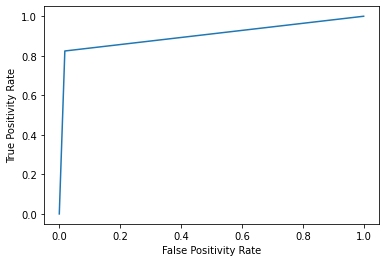

In [ ]:
from sklearn.metrics import roc_curve

#plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, lrmodel_pred)
plt.plot(fpr, tpr)

plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.show()

Random Forrest Model- for interpretability

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib.pyplot as plt


In [ ]:

X = master[['acc_y', 'acc_z', 'pitch', 'max_acc_x','max_acc_z', 'max_gyro_x', 'max_gyro_z', 'max_pitch', 'min_acc_x', 'min_acc_y', 'min_gyro_x', 'min_gyro_z']]
y = master[['label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: D

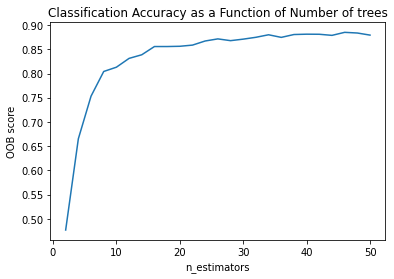

In [ ]:

clf = RandomForestClassifier(n_estimators = 10, oob_score = True)
clf.fit(X, y)


n_trees = list(range(2,52,2))
oob_score_list = []

for i in n_trees:
    clf = RandomForestClassifier(n_estimators = i, oob_score = True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    oob_score = clf.oob_score_
    oob_score_list.append(oob_score)

#create plot to show relationship between numbers of trees and OOB score 

plt.plot(n_trees, oob_score_list)
plt.xlabel("n_estimators")
plt.ylabel("OOB score")
plt.title("Classification Accuracy as a Function of Number of trees")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ACCURACY OF THE MODEL:  0.8984216916228248
OOB Score 0.8848222029488292


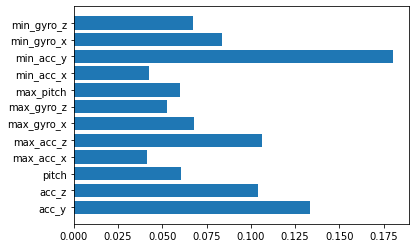

Text(0.5, 0, 'Random Forest Feature Importance')

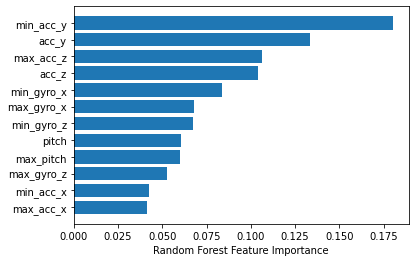

In [ ]:
#finding the most important features
#using 50 treees
clf = RandomForestClassifier(n_estimators = 50, oob_score = True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#calculate accuracy score
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#calculate OOB score
oob_score = clf.oob_score_
print("OOB Score",oob_score)

#create chart to show feature importances
clf.feature_importances_
plt.barh(X.columns, clf.feature_importances_)
plt.show()

sorted_idx = clf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
oomaster.shape

(8236, 79)

# New Stuff

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel

y = master['label']
X = master.drop('label', axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import metrics 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



In [ ]:
best = {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(max_iter=100, activation= 'tanh', alpha= 0.0001, hidden_layer_sizes = (50, 50, 50), learning_rate = 'adaptive', solver = 'adam')


In [ ]:
clf = clf.fit(X_train,y_train)
pred=clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         BSC       0.74      0.71      0.72        35
         CHU       0.92      0.96      0.94        25
         CSI       0.85      0.93      0.89        61
         CSO       0.96      0.99      0.97        67
         FKL       0.72      0.61      0.66        46
         FOL       0.58      0.67      0.62        45
         JOG       0.92      0.57      0.71        40
         JUM       0.90      0.90      0.90        30
         LYI       0.89      0.73      0.80       150
         SCH       0.92      0.90      0.91        80
         SDL       0.68      0.59      0.63        39
         SIT       0.84      0.94      0.89       242
         STD       0.89      0.96      0.93       644
         STN       0.69      0.52      0.60        69
         STU       0.84      0.73      0.78        63
         WAL       0.00      0.00      0.00        12

    accuracy                           0.86      1648
   macro avg       0.77   

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectFromModel

y = master['label']
X = master.drop('label', axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=0)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr', C=10)
model.fit(X_train, y_train)
lrmodel_pred = model.predict(X_test)
print(classification_report(y_test, lrmodel_pred))

              precision    recall  f1-score   support

         BSC       0.00      0.00      0.00        35
         CHU       1.00      0.04      0.08        25
         CSI       0.36      0.07      0.11        61
         CSO       0.59      0.45      0.51        67
         FKL       0.00      0.00      0.00        46
         FOL       0.00      0.00      0.00        45
         JOG       0.00      0.00      0.00        40
         JUM       0.00      0.00      0.00        30
         LYI       0.42      0.11      0.17       150
         SCH       0.65      0.38      0.48        80
         SDL       0.00      0.00      0.00        39
         SIT       0.41      0.77      0.54       242
         STD       0.54      0.87      0.67       644
         STN       0.00      0.00      0.00        69
         STU       0.00      0.00      0.00        63
         WAL       0.00      0.00      0.00        12

    accuracy                           0.50      1648
   macro avg       0.25   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
